<a href="https://colab.research.google.com/github/ducan0124567/ALPR_test_colab/blob/master/ALPR_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/ducan0124567/ALPR_test_colab

Cloning into 'ALPR_test_colab'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4
Unpacking objects: 100% (4/4), done.


In [ ]:
%cd /content
!unzip /content/ALPR_test_colab/WPODNET_MobileNets2.zip

/content
Archive:  /content/ALPR_test_colab/WPODNET_MobileNets2.zip
   creating: WPODNET_MobileNets/
   creating: WPODNET_MobileNets/.idea/
  inflating: WPODNET_MobileNets/.idea/.gitignore  
   creating: WPODNET_MobileNets/.idea/inspectionProfiles/
  inflating: WPODNET_MobileNets/.idea/inspectionProfiles/profiles_settings.xml  
  inflating: WPODNET_MobileNets/.idea/inspectionProfiles/Project_Default.xml  
  inflating: WPODNET_MobileNets/.idea/misc.xml  
  inflating: WPODNET_MobileNets/.idea/modules.xml  
  inflating: WPODNET_MobileNets/.idea/workspace.xml  
  inflating: WPODNET_MobileNets/.idea/WPODNET_MobileNets.iml  
  inflating: WPODNET_MobileNets/Accuracy_wpod.xlsx  
  inflating: WPODNET_MobileNets/Accuracy_wpod_long.xlsx  
  inflating: WPODNET_MobileNets/data_utils.py  
  inflating: WPODNET_MobileNets/GUI.au3  
  inflating: WPODNET_MobileNets/GUI.exe  
  inflating: WPODNET_MobileNets/gui_img.jpg  
  inflating: WPODNET_MobileNets/license_character_classes.npy  
  inflating: WPODNET

In [ ]:
%cd /content/WPODNET_MobileNets/
import argparse
import timeit

from natsort import natsorted

from WpodDetect import *
from preprocess import *
from recognition import *
from segmentation import *

from google.colab.patches import cv2_imshow

def one_image(path):
    filelist = [f for f in os.listdir('visualize')]
    for f in filelist:
        os.remove(os.path.join('visualize', f))

    start = timeit.default_timer()
    crop_LP_arr, image_dectect, x_arr, y_arr = Wpod_detect(path)
    stop_yolo = timeit.default_timer()
    time_yolo = stop_yolo - start
    time_execute_preprocess = 0
    time_execute_g_segement = 0
    time_execute_recognition = 0
    if crop_LP_arr is None:
        cv2.imwrite('visualize/done.jpg', image_dectect)
        cv2.imshow('done', image_dectect)
        cv2.waitKey()
        cv2.destroyAllWindows()
        return image_dectect
    for i in range(len(crop_LP_arr)):
        start_preprocess = timeit.default_timer()
        plate_image, gray, blur, binary, final = preprocess_img(crop_LP_arr[i])
        stop_preprocess = timeit.default_timer()
        time_execute_preprocess = time_execute_preprocess + stop_preprocess - start_preprocess

        visualize_results_preprocess(plate_image, gray, blur, binary, final)

        cv2.imwrite('visualize/preprocess.png', final)
        start_g_segment = timeit.default_timer()
        ig, crop_characters, crop_characters_line2 = g_segment(plate_image, final, final)
        stop_g_segment = timeit.default_timer()
        time_execute_g_segement = time_execute_g_segement + stop_g_segment - start_g_segment

        visualize_segment(ig, crop_characters, crop_characters_line2)

        start_recognition = timeit.default_timer()
        s = visualize_g_recognition(crop_characters, crop_characters_line2, crop_LP_arr[i])

        stop_recognition = timeit.default_timer()
        time_execute_recognition = time_execute_recognition + stop_recognition - start_recognition

        plate_color = get_bgcolor_LP(crop_LP_arr[i])
        if len(crop_characters_line2) == 0:
            plate_square = 'long'
        else:
            plate_square = 'square'
        if (len(s)) >= 6:
            print('LP: ', s)
            print('Type: ', plate_square)
            print('Color: ', plate_color)
            if len(crop_characters) > 3 and len(crop_characters_line2) > 0:
                print('Vehicle: Motorbike\n')
            else:
                print('Vehicle: Car\n')
            image_dectect = draw_number(image_dectect, x_arr[i], y_arr[i], s)

    print('Time detect wpod: ', time_yolo)
    print('Time preprocess: ', time_execute_preprocess)
    print('Time segmentation: ', time_execute_g_segement)
    print('Time recognition: ', time_execute_recognition)
    print('Total time: ', time_yolo + time_execute_preprocess + time_execute_g_segement + time_execute_recognition)

    cv2.imwrite('visualize/done.jpg', image_dectect)
    # cv2.namedWindow('done', cv2.WINDOW_NORMAL)
    # cv2.resizeWindow('done', 600, 600)
    # cv2.imshow('done', image_dectect)
    cv2_imshow(image_dectect)
    cv2.waitKey()
    cv2.destroyAllWindows()

# MobileNets
json_path = 'MobileNets_character_recognition.json'
weights_path = 'License_character_recognition.h5'
label_path = 'license_character_classes.npy'

# Yolo
classes_path = 'obj.names'
weights_yolo_path = 'yolov3-obj_last.weights'
config_path = 'yolo-obj-v3.cfg'

# Wpod
json_path_wpod = 'wpod-net.json'

start = timeit.default_timer()
LoadModelMobileNets(json_path, weights_path, label_path)
stop = timeit.default_timer()
print('\nTime load MobileNets: ', stop - start)

start = timeit.default_timer()
Wpod_Init(json_path_wpod)
stop = timeit.default_timer()
print('Time load WPOD: ', stop - start)
print('\n')

/content/WPODNET_MobileNets

Time load MobileNets:  2.8636983290000018
Time load WPOD:  1.168359430999999




Saving 14968839.jpg to 14968839 (1).jpg


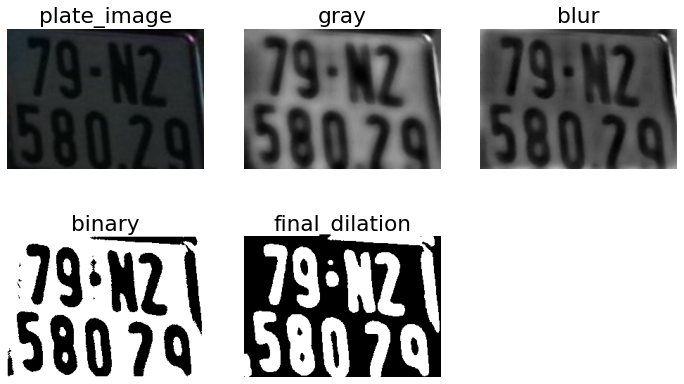

Detect 9 letters...


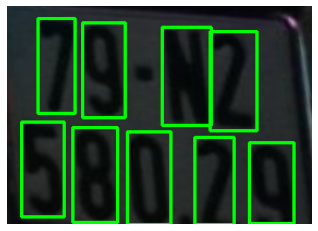

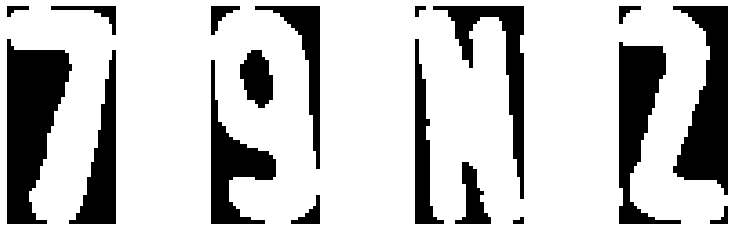

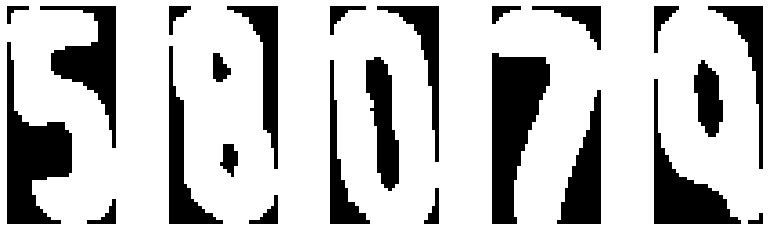

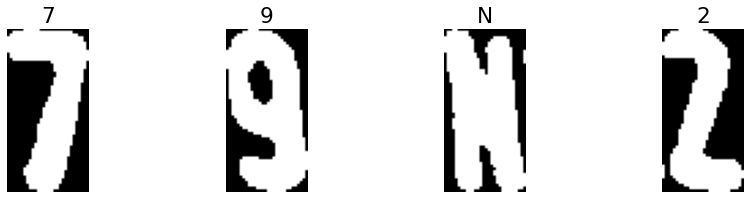

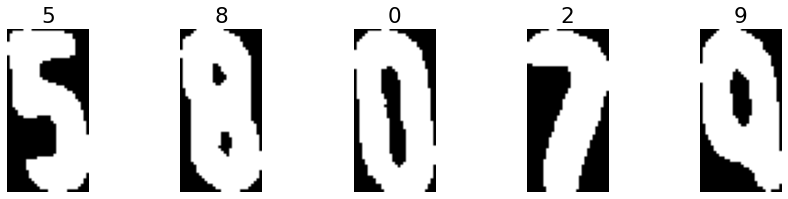

LP:  79N258029
Type:  square
Color:  white
Vehicle: Motorbike

Time detect wpod:  0.07957590199998776
Time preprocess:  0.13948991200004457
Time segmentation:  0.0012867860000369546
Time recognition:  1.1318025260000013
Total time:  1.3521551260000706


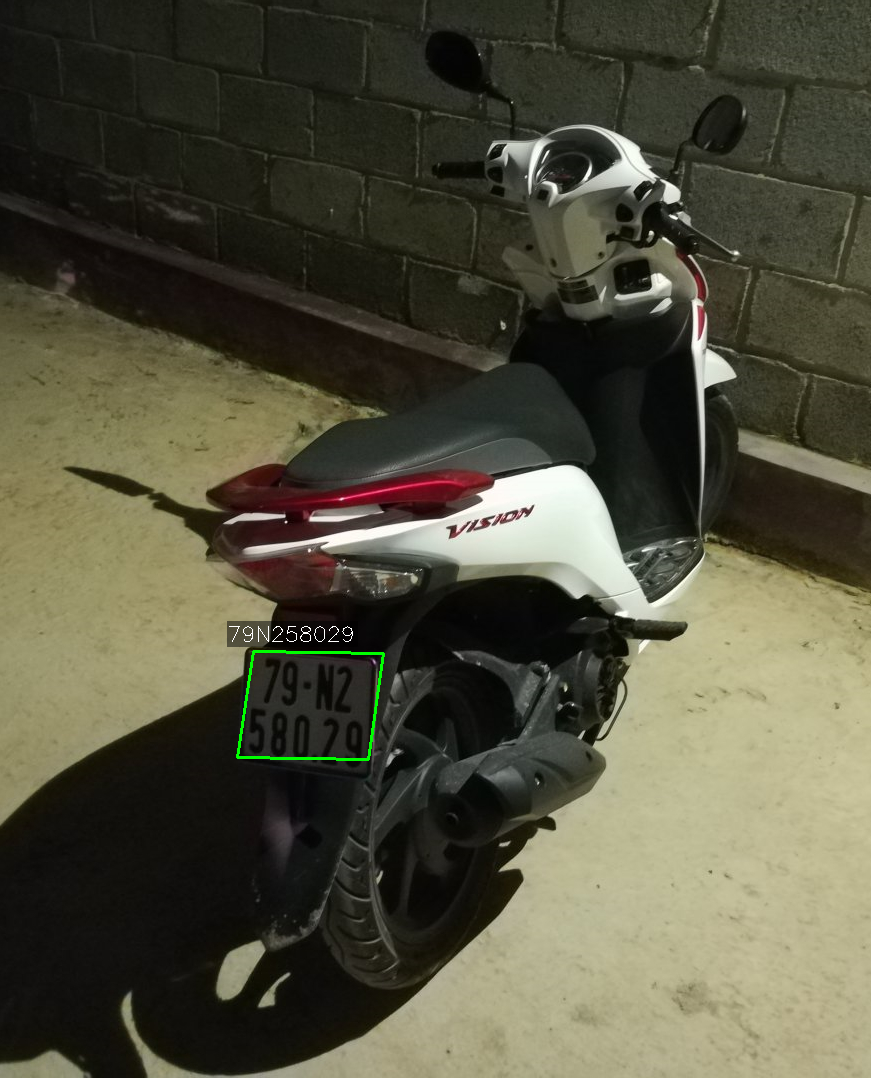

In [11]:
from google.colab import files
uploaded = files.upload()
ImgPath = list(uploaded.keys())[0]
one_image(ImgPath)
